Tugas ini berupa mini project yang diselesaikan diakhir pertemuan bulan pertama. Tugas disusun sesuai dengan materi yang diberikan tiap harinya di pekan 4. 

# Dataset

Dataset Pelanggan Supermarket berada di folder data.



---



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load data

df = pd.read_csv('data/pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0




---



---



---



# Soal 1. Statistika Deskriptif

Lakukan eksplorasi data dengan menggunakan statistika deskriptif.

In [4]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000




---



---



---



# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull(). 

Isi nilai nan dengan nilai sebelumnya di row tersebut. Gunakan method .fillna() dengan argument method bernilai 'ffill'.

Cek keberadaan missing value sebelum imputasi

In [5]:
print(df.isnull().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64


isi nilai nan dengan menggunakan metode 'ffill' 

In [6]:
no_NaN = df.fillna(method = 'ffill')
no_NaN

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


Cek kembali keberadaan missing value setelah imputasi

In [7]:
print(no_NaN.isnull().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64




---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

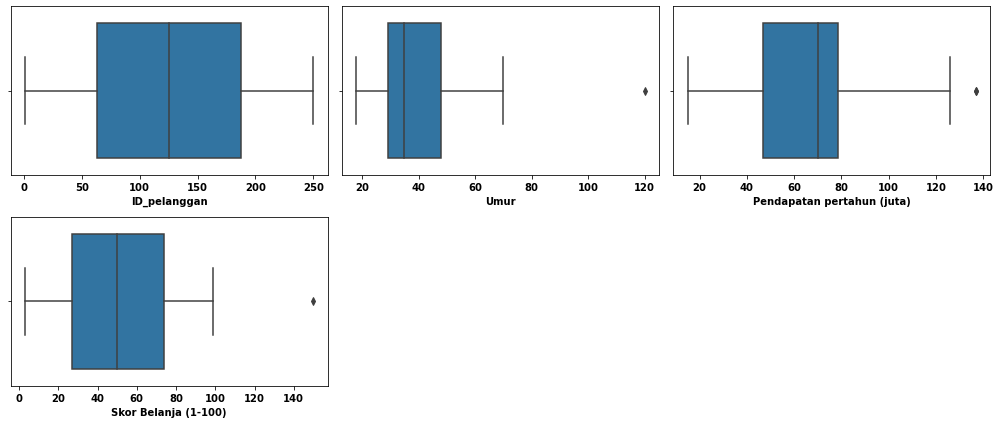

In [8]:
#Menampilkan Boxplot masing-masing kolom berisi data kuantitatif sebelum handling outlier
#Jenis plot yang digunakan adalah boxplot seaborn

plt.figure(figsize=(14,6))

for i, j in enumerate(no_NaN.describe().columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = no_NaN[j])
    plt.tight_layout()
    
plt.show()

In [9]:
#Menghilangkan Outlier dan menampilkan dataframe hasil menghilangkan outliernya

def get_Outliers_index(dframe):
    
    outliers_index = []
    for col in dframe.describe().columns:
        Q1 = dframe[col].quantile(0.25)
        Q3 = dframe[col].quantile(0.75)
    
        IQR = Q3-Q1
    
        lower_limit = Q1-(1.5*IQR)
        upper_limit = Q3+(1.5*IQR)
    
        outliers = dframe[ (dframe[col]<lower_limit) | (dframe[col]>upper_limit) ].index
        outliers_index.extend(outliers.to_list())
    
    outliers_index = set(outliers_index)  #Convert to set to remove duplicate numbers
    outliers_index = list(outliers_index) #Convert the set back to list
    
    outliers_index.sort()                 #Sort the list
    
    return outliers_index

get_Outliers_index(no_NaN)

[16, 198, 199, 249]

In [10]:
#DataFrame hasil handling outlier

out_cust = get_Outliers_index(no_NaN)

no_NaN.drop(out_cust, inplace=True)

display(no_NaN[["Umur","Pendapatan pertahun (juta)","Skor Belanja (1-100)"]])

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,19.0,15,39.0
1,21.0,15,81.0
2,20.0,16,6.0
3,23.0,16,77.0
4,31.0,17,40.0
...,...,...,...
244,27.0,88,69.0
245,59.0,93,14.0
246,35.0,93,90.0
247,37.0,97,32.0


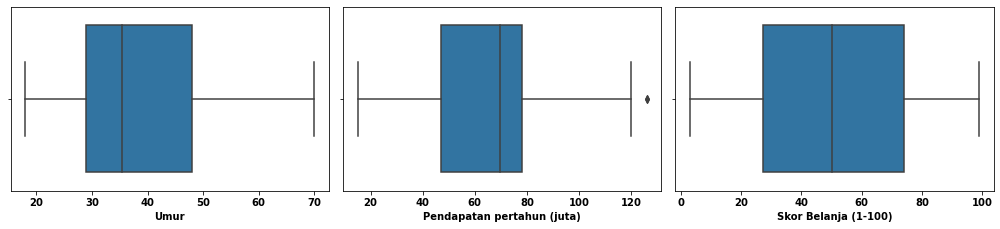

In [11]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sesudah handling outlier

plt.figure(figsize=(14,6))

for i, j in enumerate(no_NaN.describe().columns[1:4]):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = no_NaN[j])
    plt.tight_layout()
    
plt.show()



---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket adalah 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik probabilitas p-value)!
*   Level significat value acuan (disebut juga level alpha) adalah 5%
*   Gunakan variabel dataframe **hasil handling missing value dan outlier dari soal sebelumnya**
*   Berikan uraian analisis uji hipotesis menggunakan teknik p-value (untuk mendapatkan nilai p-value, silahkan gunakan fungsi **"ztest"** dari library **statsmodels.stats.weightstats**)
*   Ubahlah tipe data kolom Umur menjadi int.




In [13]:
#Lakukan sampling random

df_100 = no_NaN.sample(100,  random_state=1)
display(df_100)

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
68,69,Laki-laki,19.0,48,59.0
248,249,Perempuan,32.0,97,86.0
211,212,Laki-laki,25.0,77,12.0
225,226,Laki-laki,30.0,78,4.0
91,92,Laki-laki,18.0,59,41.0
...,...,...,...,...,...
5,6,Perempuan,22.0,17,76.0
184,185,Perempuan,41.0,99,39.0
186,187,Perempuan,54.0,101,24.0
49,50,Perempuan,31.0,40,42.0


In [14]:
df_100['Umur'] = df_100['Umur'].astype('int')

In [15]:
# menggunakan teknik p-value

from statsmodels.stats.weightstats import ztest

z_test, p_value = ztest(x1 = df_100['Umur'], value = 35)

#print the Results
print(f'Z-test is :{z_test}')
print(f'p-value is :{p_value}')

Z-test is :2.4874107887154624
p-value is :0.012867672183696988


Uraian analisis :

Karena nilai p-value = 0.012867672183696988 yang berarti p-value < 0.05 (nilai signifikansi 5%) maka H0 atau hitotesis awal ditolak. Sehingga dapat disimpulkan bahwa rata-rata usia pengunjung supermarket tidak sama dengan 35.



---



---



---



## Soal 5. EDA

### 5.a. Univariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom **dataset awal sebelum dilakukan handling missing value maupun outlier**.

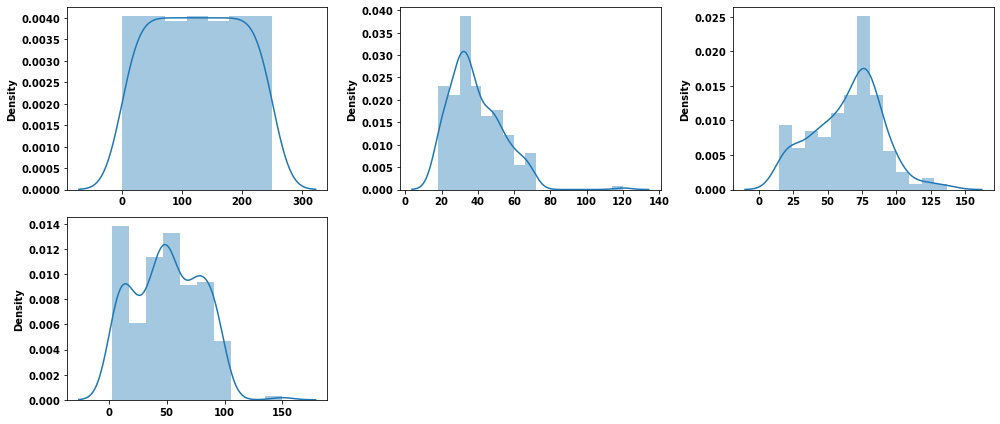

In [16]:
plt.figure(figsize=(14,6))

for i, j in enumerate(df.describe().columns):
    plt.subplot(2,3,i+1)
    sns.distplot(x = df[j])
    plt.tight_layout()
    
plt.show()

Uraian analisis :

Berdasarkan grafik diatas untuk variabel skor belanja menunjukkan bentuk kurva yang simetris yang berarti data berdistribusi normal atau sebaran datanya normal. Sedangkan untuk data umur dan pendapatan pertahun bentuk kurva tidak simetris atau cenderung miring ke kiri/ ke kanan yang berarti data tidak berdistribusi normal atau sebaran datanya tidak normal.

---

### 5.b. Bivariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi barplot untuk melihat perbandingan skor belanja antara pengunjung perempuan dengan pengunjung lai-laki pada dataset awal **sebelum dilakukan handling missing value maupun outlier**

#### > Sort dataframe berdasarkan Skor Belanja, dari besar ke kecil


In [17]:
skor = df.sort_values(by="Skor Belanja (1-100)",ascending=False)
skor

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
11,12,Perempuan,35.0,19,99.0
19,20,Perempuan,35.0,23,98.0
185,186,Laki-laki,30.0,99,97.0
145,146,Laki-laki,28.0,77,97.0
...,...,...,...,...,...
8,9,Laki-laki,64.0,19,3.0
49,50,Perempuan,31.0,40,NaN
61,62,Laki-laki,19.0,46,NaN
94,95,Perempuan,32.0,60,NaN


#### > Tampilkan 5 data teratasnya

In [18]:
high_skor = skor.head()
high_skor

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
11,12,Perempuan,35.0,19,99.0
19,20,Perempuan,35.0,23,98.0
185,186,Laki-laki,30.0,99,97.0
145,146,Laki-laki,28.0,77,97.0


#### > Tampilkan 5 data terbawahnya

In [19]:
low_skor = skor.tail()
low_skor

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
8,9,Laki-laki,64.0,19,3.0
49,50,Perempuan,31.0,40,NaN
61,62,Laki-laki,19.0,46,NaN
94,95,Perempuan,32.0,60,NaN
117,118,Perempuan,49.0,65,NaN


#### > Buat grafiknya menggunakan barplot seaborn

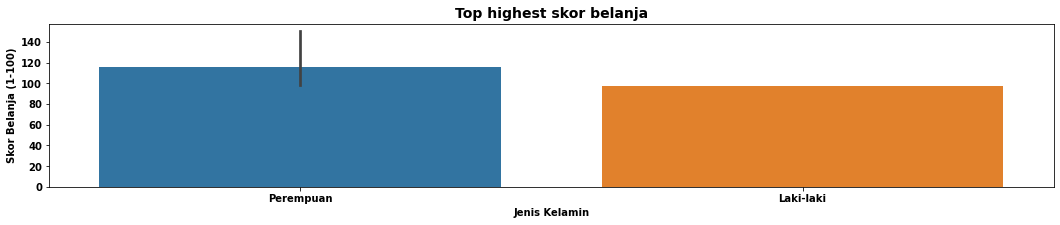

In [20]:
#Highest Skor Belanja

plt.figure(figsize=(18,3))
sns.barplot(data=high_skor,
           x="Jenis Kelamin",
           y="Skor Belanja (1-100)")
plt.title('Top highest skor belanja', fontsize='14')
plt.show()

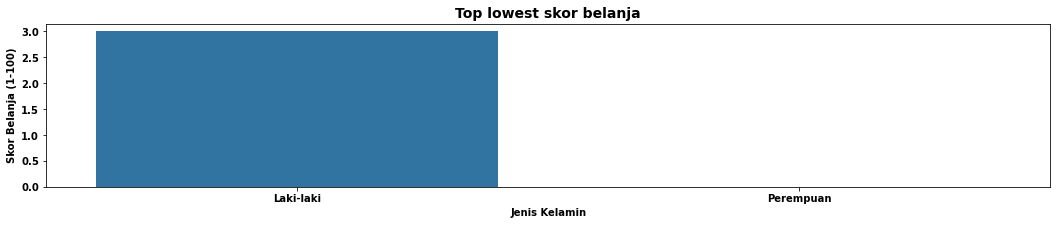

In [21]:
#Low Skor Belanja

plt.figure(figsize=(18,3))
sns.barplot(data=low_skor,
           x="Jenis Kelamin",
           y="Skor Belanja (1-100)")
plt.title('Top lowest skor belanja', fontsize='14')
plt.show()

Uraian analisis :

Berdasarkan grafik bivariat yang diperoleh, terdapat pengaruh jenis kelamin terhadap skor belanja. Grafik menunjukkan bahwa skor belanja pengunjung perempuan lebih tinggi dibanding skor belanjan pengunjung laki-laki.

---

### 5.c. Multivariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi heatmap sebagai multivariate analisis untuk melihat korelasi tertinggi dari setiap data pada dataset awal **sebelum dilakukan handling missing value maupun outlier**

Plot menggunakan heatmap seaborn.

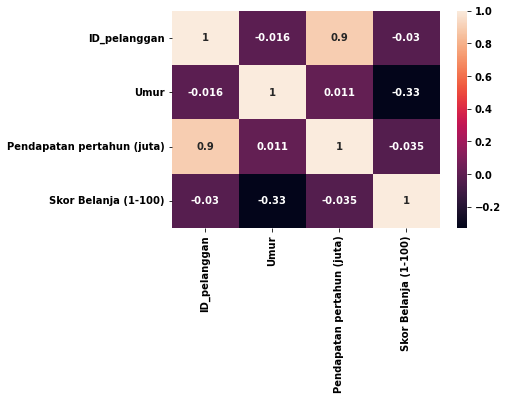

In [22]:
df_drop = df.drop(columns="Jenis Kelamin")
sns.heatmap(df_drop.corr(), annot=True, fmt='.2g')

plt.show()

Uraian analisis :

Berdasarkan grafik variabel umur dan skor belanja memiliki warna paling gelap dengan nilai korelasi negatif yang berarti korelasi antar dua variabel tersebut cukup kuat dan tidak searah, maksudnya apabila umur pengunjung semakin tua maka skor belanja cenderung semakin kecil/menurun berlaku sebaliknya. 

Sedangkan untuk korelasi variabel lain yang nilainya mendekati 0 dengan warna yang tidak cukup pekat memiliki korelasi yang lemah maksudnya hampir tidak terdapat hubungan antara variabel tersebut.



---

---



---





# Soal 6
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi **menggunakan variabel dataframe setelah handling missing value dan outlier**

In [23]:
#feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(no_NaN[['Umur','Skor Belanja (1-100)']])



---



---



---



# Soal 7

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [24]:
#clustering n=2

from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, random_state=10).fit(scaled_data)
labels2 = kmeans2.labels_

cluster_2 = pd.DataFrame(scaled_data, 
                           columns=['Umur','Skor Belanja (1-100)'])
cluster_2['k2'] = labels2

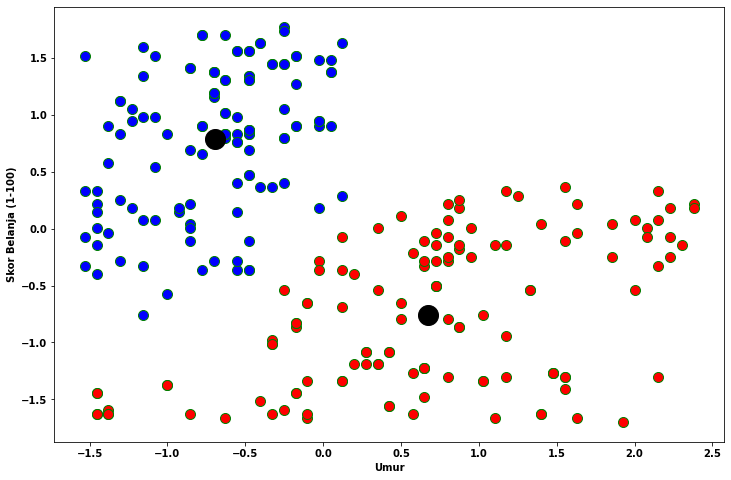

In [25]:
#visualisasi n=2 beserta centroid-centroidnya

plt.figure(figsize=(12,8))
plt.scatter(cluster_2['Umur'][cluster_2.k2 == 0], 
            cluster_2['Skor Belanja (1-100)'][cluster_2.k2 == 0], 
            c = 'b', 
            s = 100,
            edgecolors = 'green', 
            linestyle = '-')
plt.scatter(cluster_2['Umur'][cluster_2.k2 == 1], 
            cluster_2['Skor Belanja (1-100)'][cluster_2.k2 == 1], 
            c = 'r', 
            s = 100,
            edgecolors = 'green', 
            linestyle = '-')
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k', s=400)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

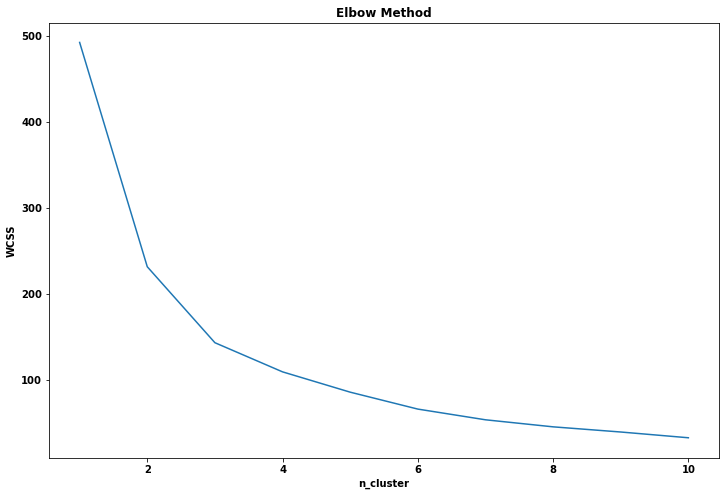

In [26]:
#elbow method beserta visualisasinya

plt.figure(figsize=(12,8))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('WCSS')
plt.show()

In [27]:
#clustering n=3

kmeans3 = KMeans(n_clusters=3, random_state=40).fit(scaled_data)
labels3 = kmeans3.labels_

cluster_3 = pd.DataFrame(scaled_data, 
                           columns=['Umur','Skor Belanja (1-100)'])
cluster_3['k3'] = labels3

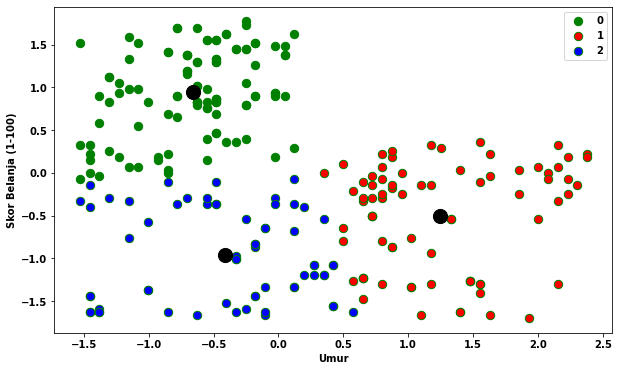

In [28]:
#visualisasi n=3 beserta centroid-centroidnya

plt.figure(figsize=(10,6))

plt.scatter(cluster_3['Umur'][cluster_3.k3 == 0], 
            cluster_3['Skor Belanja (1-100)'][cluster_3.k3 == 0], 
            c = 'g', 
            s = 70,
            edgecolors = 'green', 
            linestyle = '-',
            label = 0)
plt.scatter(cluster_3['Umur'][cluster_3.k3 == 1], 
            cluster_3['Skor Belanja (1-100)'][cluster_3.k3 == 1], 
            c = 'r', 
            s = 70,
            edgecolors = 'green', 
            linestyle = '-',
            label = 1)
plt.scatter(cluster_3['Umur'][cluster_3.k3 == 2], 
            cluster_3['Skor Belanja (1-100)'][cluster_3.k3 == 2], 
            c = 'b', 
            s = 70,
            edgecolors = 'green', 
            linestyle = '-', 
            label = 2)

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k', s=200)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.legend()
plt.show()

In [29]:
#tampilan silhoutte score untuk n=2 dan n=3
from sklearn.metrics import silhouette_score

print('silhouette_score untuk n = 2 :',silhouette_score(scaled_data, labels = labels2))
print('silhouette_score untuk n = 3 :',silhouette_score(scaled_data, labels = labels3))

silhouette_score untuk n = 2 : 0.4854766884293722
silhouette_score untuk n = 3 : 0.4632211897833843


---
---
---

## Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket.
Langkah-langkah:

* Buatlah dataframe hasil inverse scaling dari hasil pengerjaan no. 6
* Masukkan label hasil clustering K=3 ke data frame baru ini.
* Tampilkan kembali scatterplot berdasarkan data frame baru ini
* Buatlah uraian analisa dari grafik tersebut
* Berikan rekomendasi kepada manajemen supermarket tersebut untuk meningkatkan penjualan

In [30]:
#Inverse transform hasil pengerjaan no. 6 kemudian jadikanlah dataframe

inv_scaled = scaler.inverse_transform(scaled_data)
new_df1 = pd.DataFrame(data= inv_scaled,
                       columns=['Umur','Skor Belanja (1-100)'])

new_df1['label_k3'] = labels3
new_df1

,Umur,Skor Belanja (1-100),label_k3
0,19.0,39.0,2
1,21.0,81.0,0
2,20.0,6.0,2
3,23.0,77.0,0
4,31.0,40.0,2
...,...,...,...
241,27.0,69.0,0
242,59.0,14.0,1
243,35.0,90.0,0
244,37.0,32.0,2


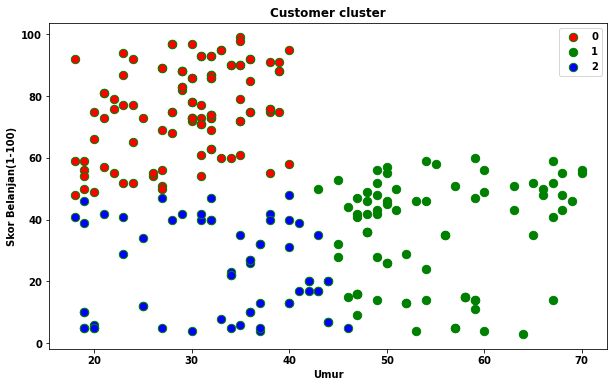

In [31]:
plt.figure(figsize = (10,6))
plt.scatter(new_df1['Umur'][new_df1.label_k3 == 0], 
            new_df1['Skor Belanja (1-100)'][new_df1.label_k3 == 0], 
            c = 'r', 
            s = 70,
            edgecolors = 'green', 
            linestyle = '-',
            label = 0)
plt.scatter(new_df1['Umur'][new_df1.label_k3 == 1], 
            new_df1['Skor Belanja (1-100)'][new_df1.label_k3 == 1], 
            c = 'g', 
            s = 70,
            edgecolors = 'green', 
            linestyle = '-',
            label = 1)
plt.scatter(new_df1['Umur'][new_df1.label_k3 == 2], 
            new_df1['Skor Belanja (1-100)'][new_df1.label_k3 == 2], 
            c = 'b', 
            s = 70,
            edgecolors = 'green', 
            linestyle = '-', 
            label = 2)

plt.title('Customer cluster')
plt.xlabel('Umur')
plt.ylabel('Skor Belanjan(1-100)')
plt.legend()
plt.show()

Uraian analisis :

Berdasarkan grafik customer cluster, terbentuk tiga cluster berbeda yaitu cluster biru, merah, dan hijau. 

Pertama cluster berwarna biru untuk kelompok pelanggan muda yang umurnya berkisar antara 20 sampai 40-an tahun dan memiliki skor belanja rendah. 

Kedua cluster berwarna merah untuk kelompok pelanggan muda yang umurnya berkisar antara 20 sampai 40-an tahun dan memiliki skor belanja tinggi. 

Pertama cluster berwarna hijau untuk kelompok pelanggan tua yang umurnya berkisar antara 50 sampai 70-an tahun dan memiliki skor belanja rendah. 

Untuk meningkatkan penjualan sebaiknya supermarket lebih melengkapi dan meningkatkan kualitas produk yang dibutuhkan oleh pelanggan dengan kelompok usia tua (50-70 tahun) sehingga dapat menaikkan skor belanja dari pelanggan cluster hijau.